# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [11]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

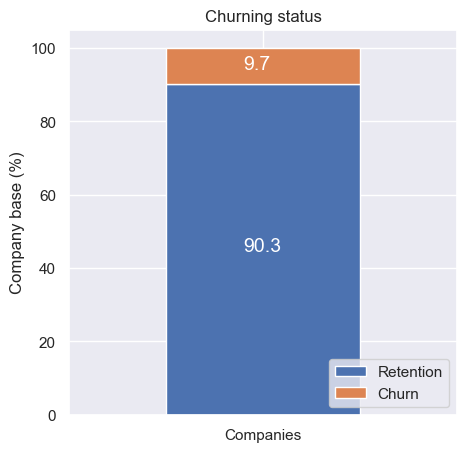

In [12]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

As we can see from the graph above, about 9.7% of customer churned.

In [13]:
# churn by sale channels
channel = client_df[['id','channel_sales','churn']].groupby(['channel_sales','churn'])['id'].count().unstack(level = 1).fillna(0)
churn_channel = (channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)


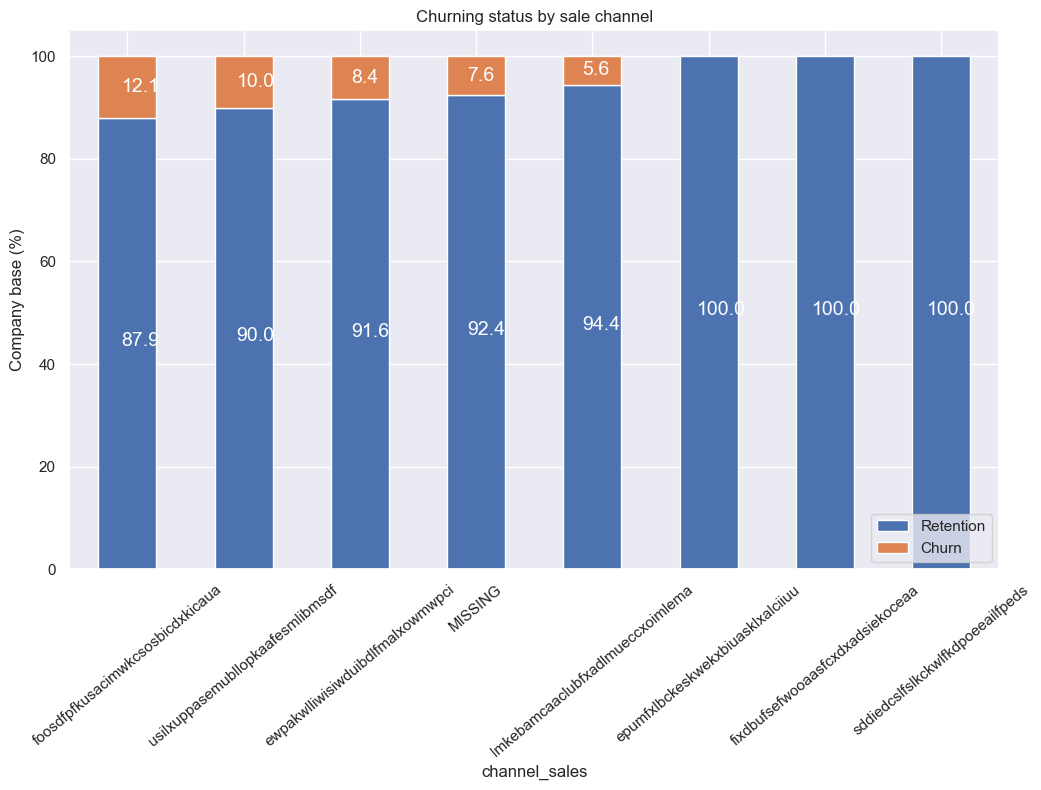

In [18]:
plot_stacked_bars(churn_channel, "Churning status by sale channel", (12, 7), 40, "lower right")

From the graph above, it can be seen that there are 5 out of 8 sales channels have churned customer, with 12.1% of customer churn from foosdfpfkusacimwkcsosbicdxkicaua. One thing to note is that there's a channel name MISSING which is likely contains NA numbers, and we might need to pay close attention to.

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

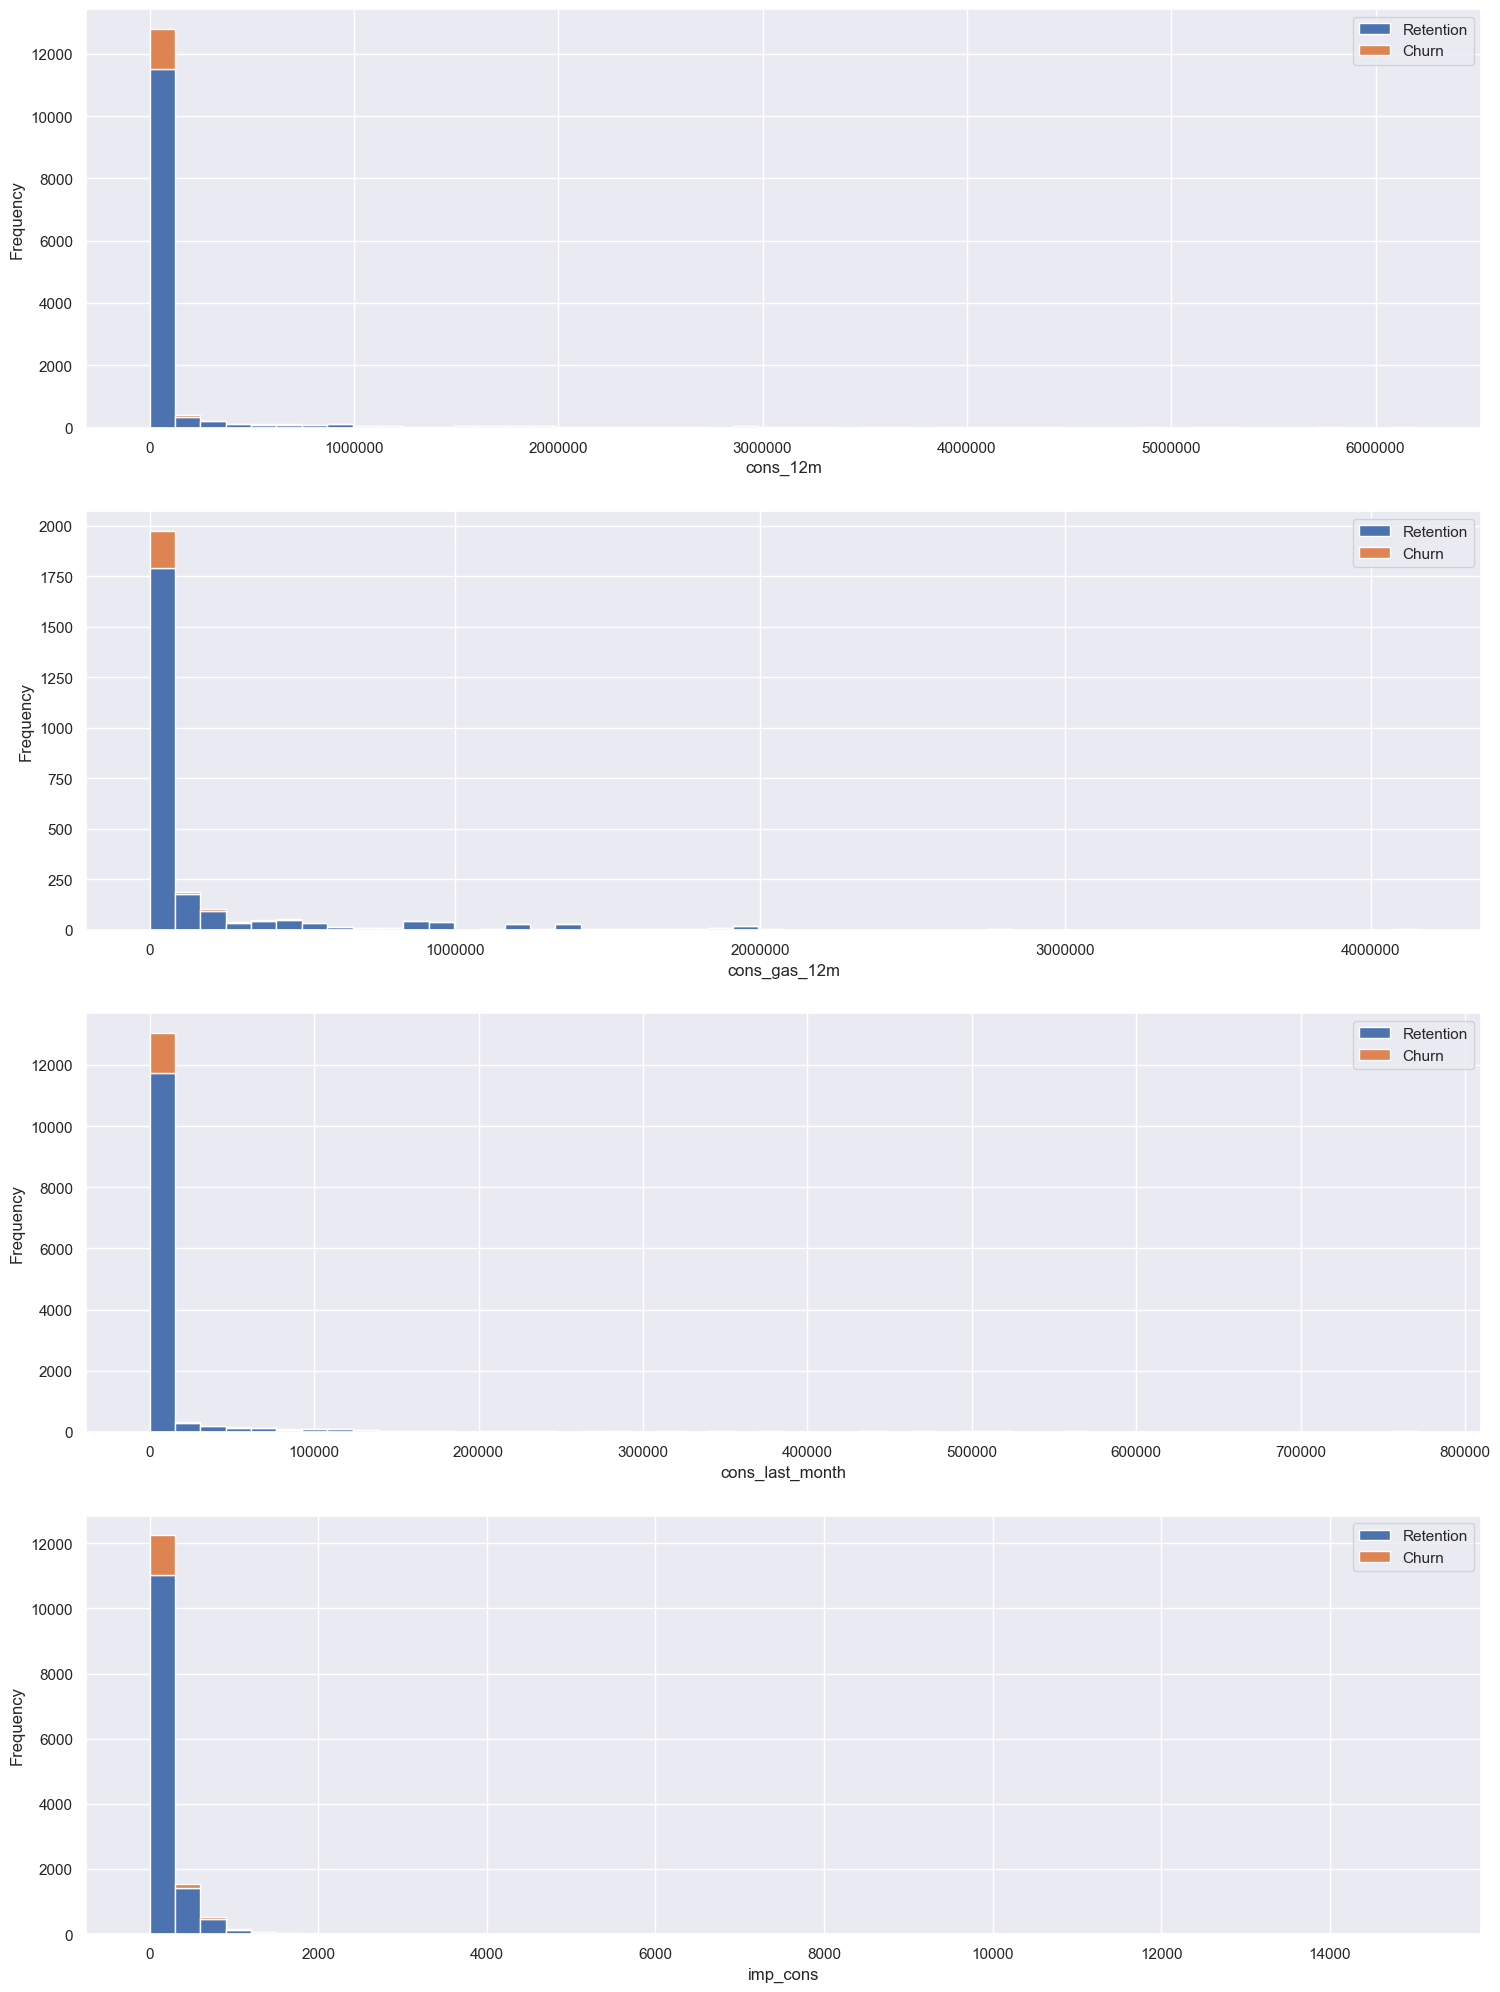

In [28]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])

plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])
plot_distribution( consumption[consumption['has_gas']=='t'],'cons_gas_12m', axs[1])

Similar to other group, we can see that consumption features are also very skewed, this will be addresses later when we cleaning data.

### Contract group

In [29]:
contract_type = client_df[['id','has_gas','churn']].groupby(['has_gas','churn'])['id'].count().unstack(level = 1).fillna(0)
churn_contract = (contract_type.div(contract_type.sum(axis=1),axis = 0)*100).sort_values(by = [1], ascending = False)

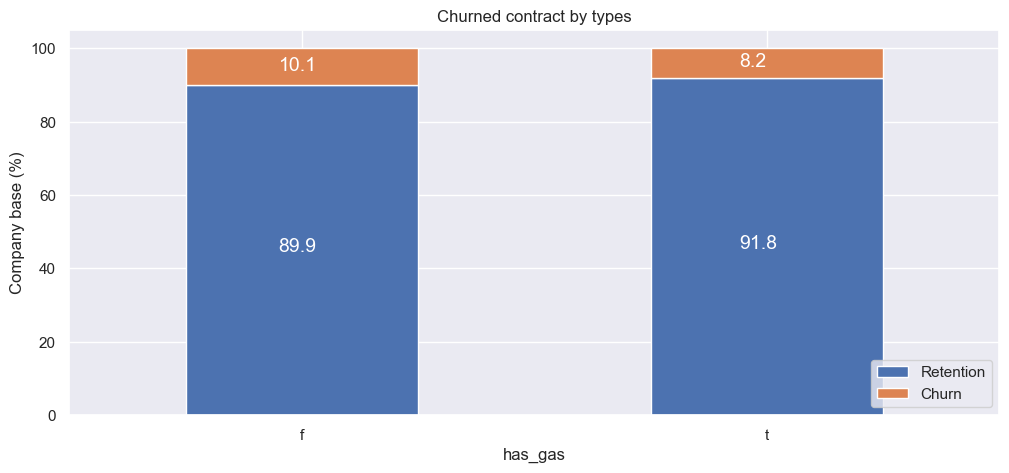

In [30]:
plot_stacked_bars(churn_contract, "Churned contract by types", (12,5),0,'lower right')

Based on the plot above, we can see that churn rate is affected much by contract types. So up next, we could have a look at number of years active as customer to see if there are any correlations

### Loyalty 

In [36]:
loyalty = client_df[['id','num_years_antig','churn']].groupby(['num_years_antig','churn'])['id'].count().unstack(level = 1).fillna(0)
churn_loyalty = (loyalty.div(loyalty.sum(axis=1),axis=0)*100).sort_values(by = [1],ascending = False)

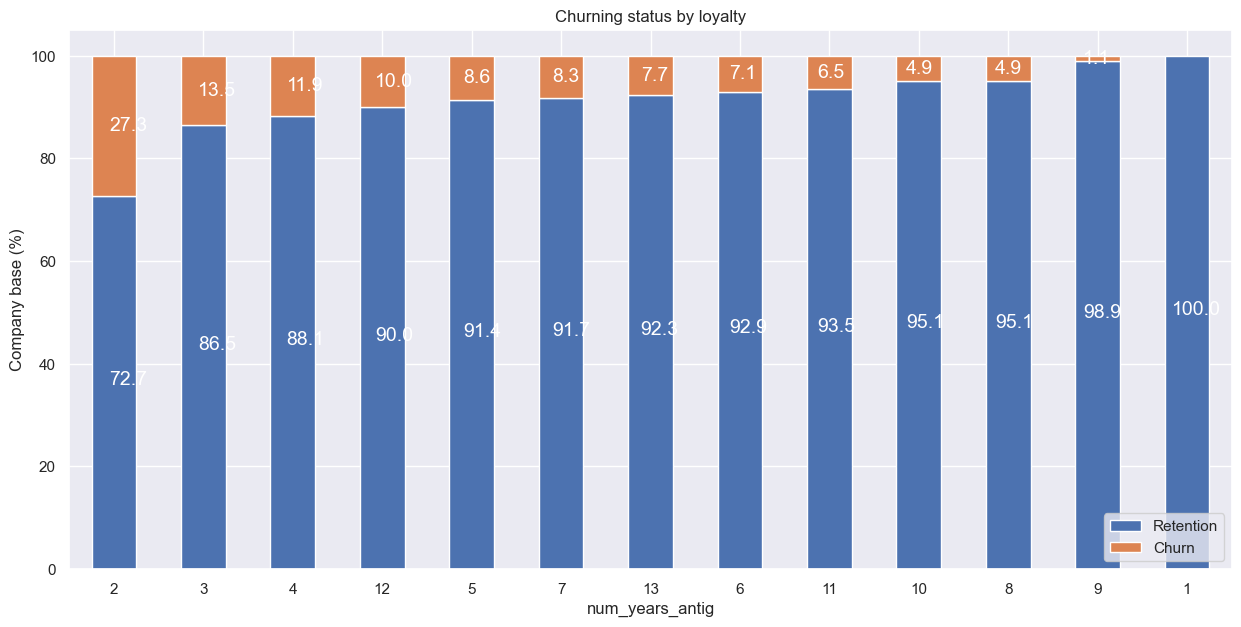

In [37]:
plot_stacked_bars(churn_loyalty, "Churning status by loyalty", (15,7),0,'lower right')

One interesting thing we could notice here is that the more years customer spend with the company, the less likely they are to leave. 

#### We could continue with looking at the contribution of each columns in the forecast group.

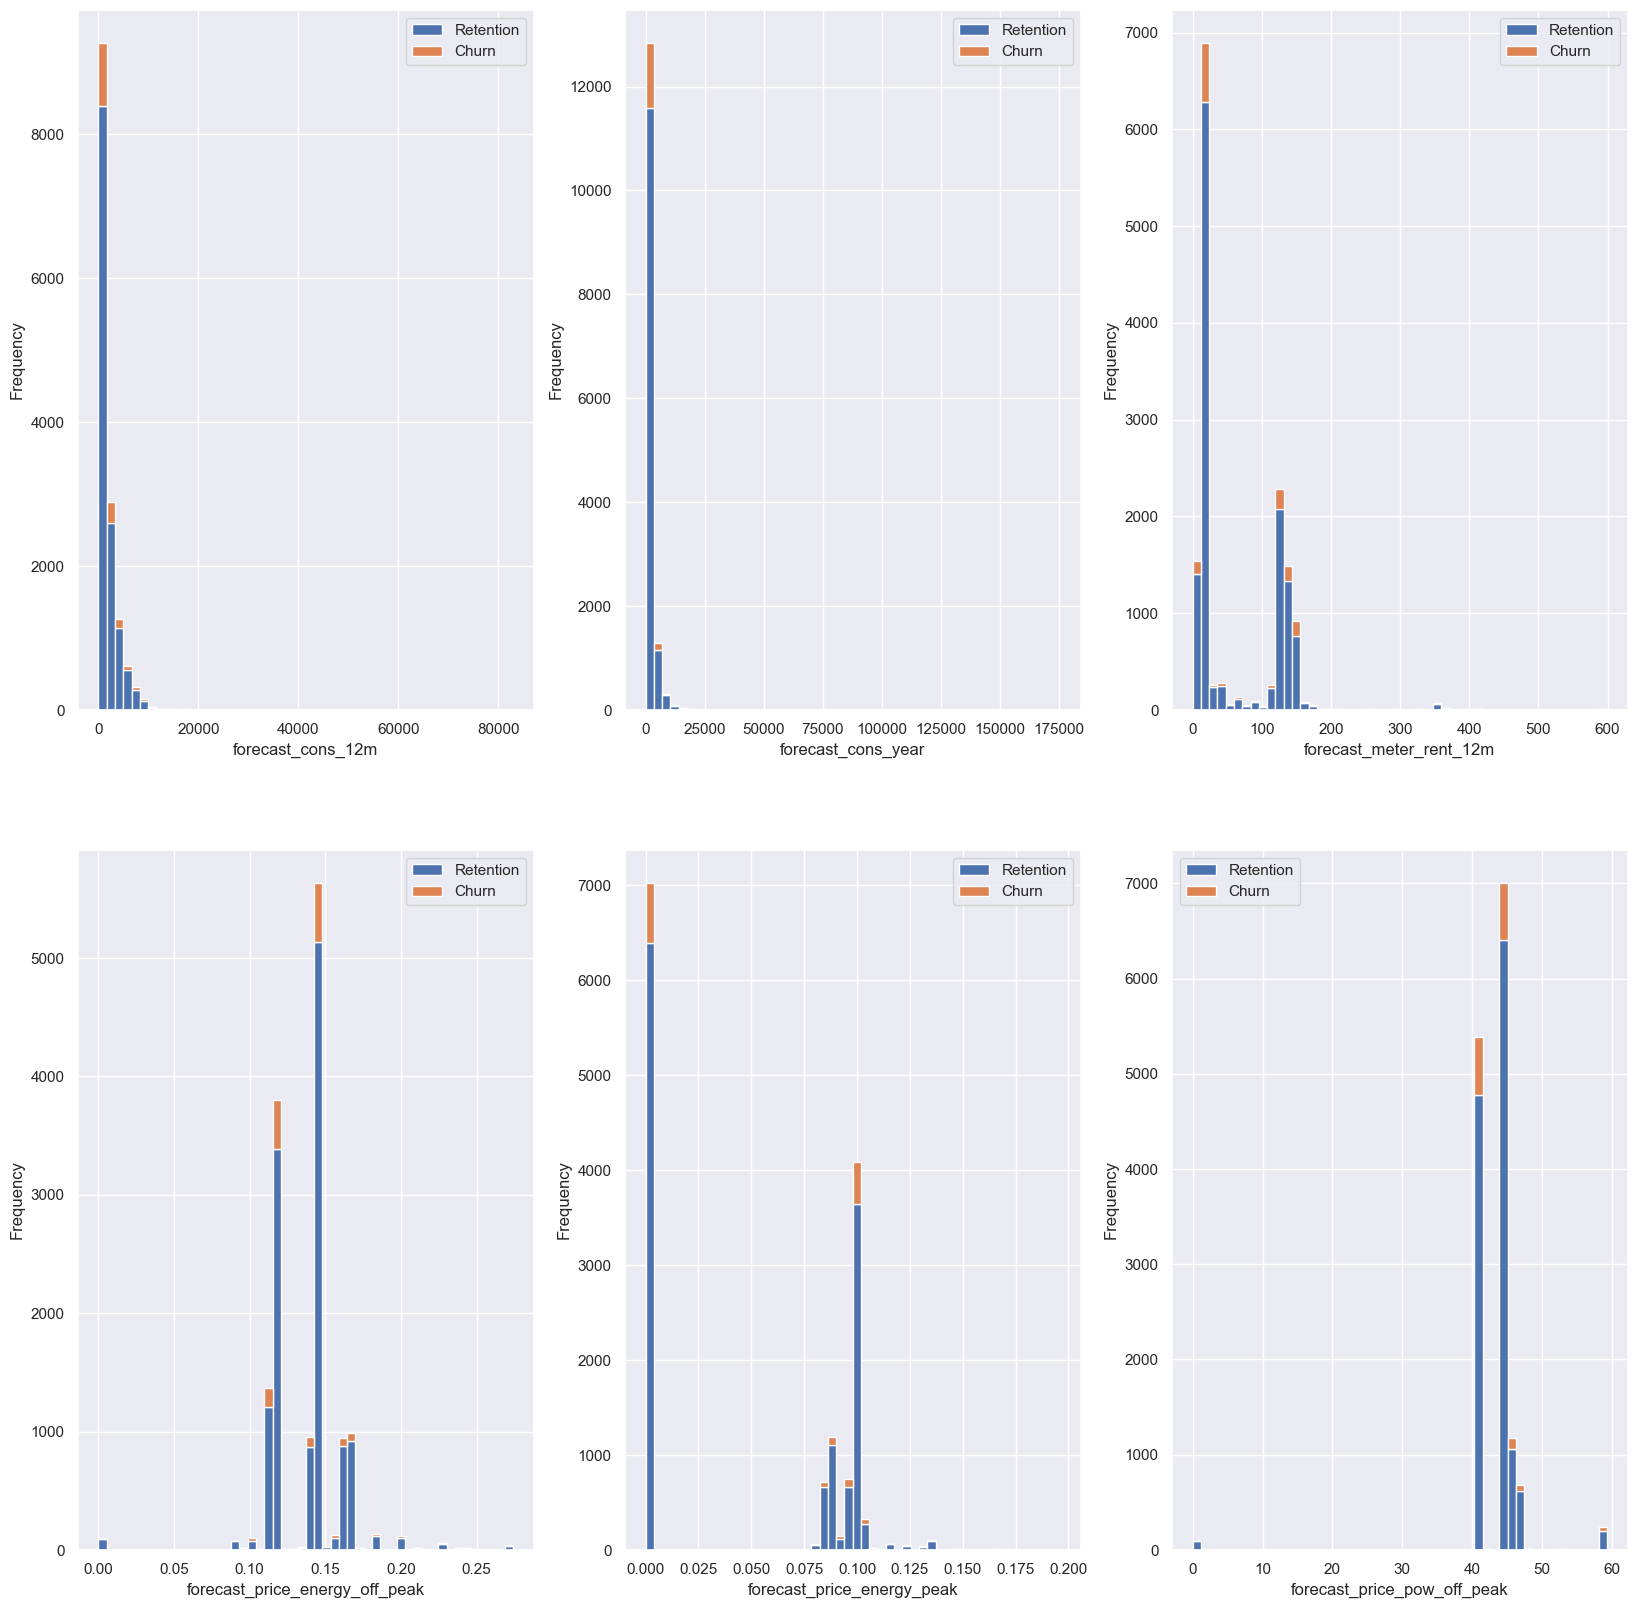

In [40]:
forecast = client_df[['id','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','forecast_discount_energy','churn']]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
plot_distribution(forecast, 'forecast_cons_12m', axs[0, 0])
plot_distribution(forecast, 'forecast_cons_year', axs[0, 1])
plot_distribution(forecast, 'forecast_meter_rent_12m', axs[0, 2])
plot_distribution(forecast, 'forecast_price_energy_off_peak', axs[1, 0])
plot_distribution(forecast, 'forecast_price_energy_peak', axs[1, 1])
plot_distribution(forecast, 'forecast_price_pow_off_peak', axs[1, 2])



we can also see here that all data are very skewed in all columns, which we will deal with in data cleaning part.

### Margin

For margin, we only need to inspect its distribution without concern about churning

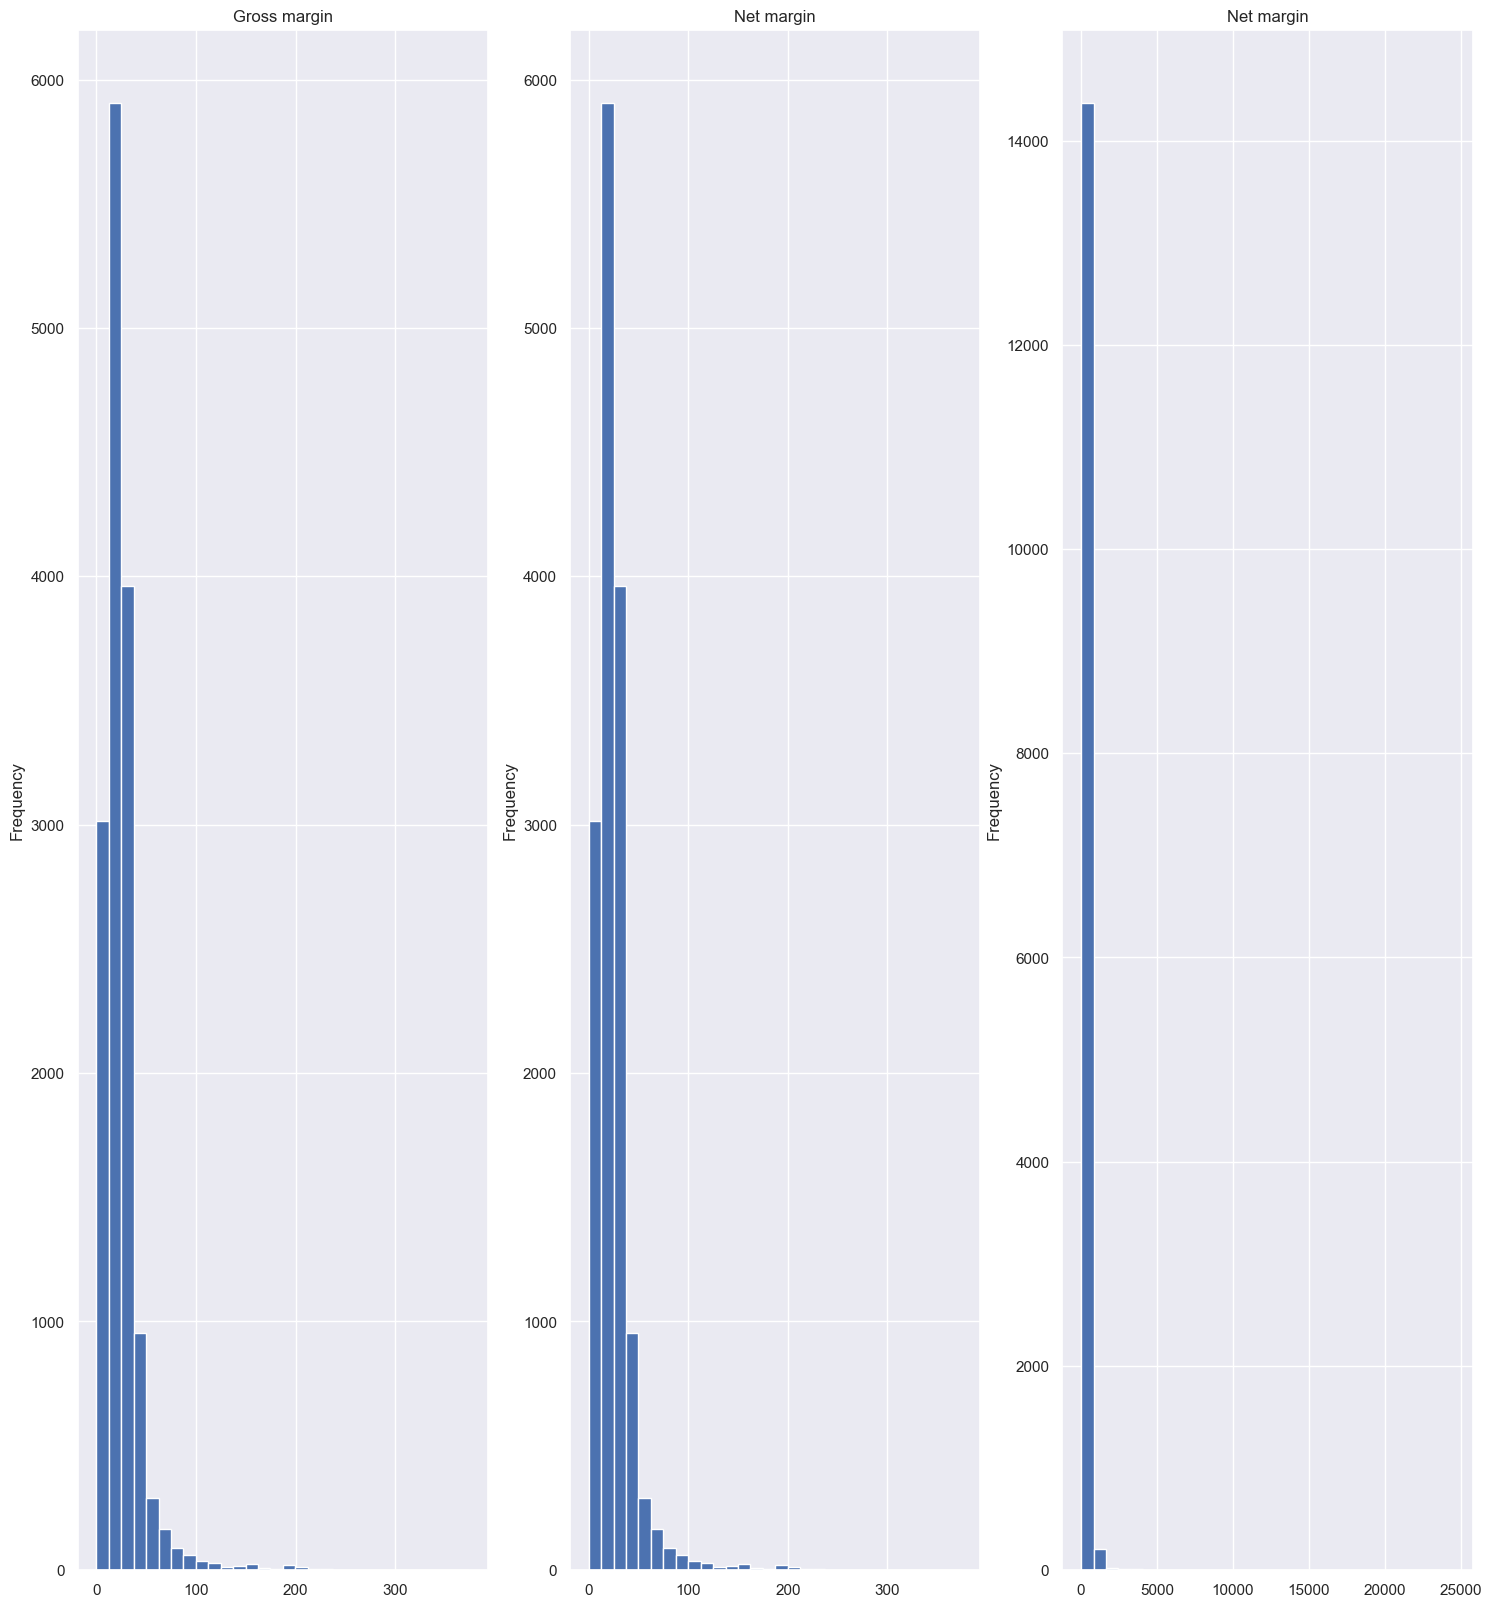

In [53]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig, axs = plt.subplots(ncols= 3, figsize=(18,20))
margin['margin_gross_pow_ele'].plot(kind='hist', ax=axs[0], bins=30, title='Gross margin')
margin['margin_net_pow_ele'].plot(kind='hist', ax=axs[1], bins=30, title='Net margin')
margin['net_margin'].plot(kind='hist', ax=axs[2], bins=30, title='Net margin')
plt.show()

We can see that it is also very skewed to the right, to see more clearly we can use boxplot

# Data Cleaning

As we can see from the description above of both clients and price data, there are lots of skewed features, one where the variance is massive. In this section we will have a closer look on such data, namely margin, forecast, and consumption. For future reference, we will define outlier as: Outlier < Q1 - 1.5 IQR or > Q3 +1.5 IQR

### Margin

First of all we will visualize all the outlier by plotting a box plot. After that, we could get rid of all outliers for the sake of the model.

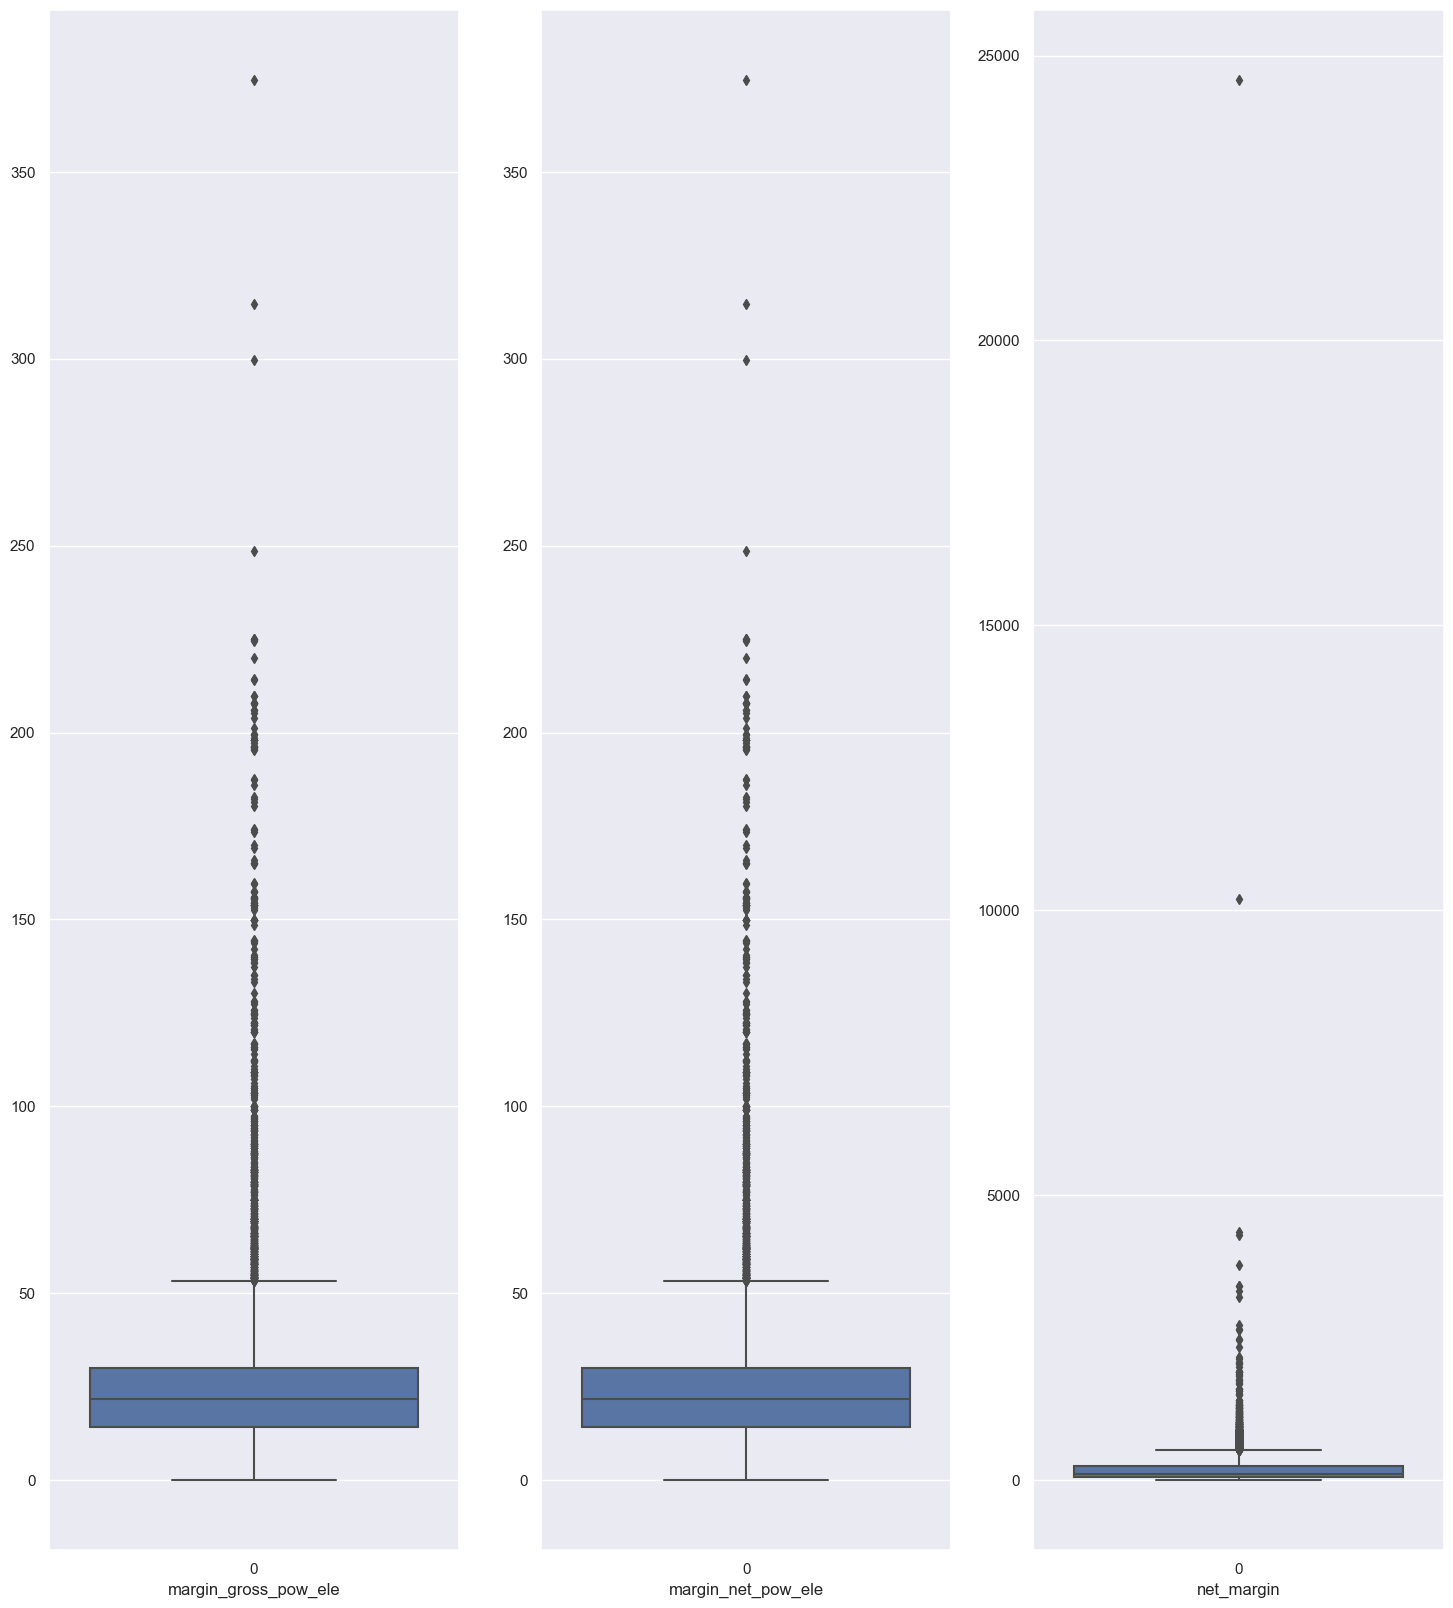

In [54]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig, axs = plt.subplots(ncols= 3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].set_xlabel(margin.columns[1])
axs[1].set_xlabel(margin.columns[2])
axs[2].set_xlabel(margin.columns[3])
plt.show()

In [97]:
def clean_data(dataframe, features):
    Q1 = dataframe[features].quantile(0.25)
    Q3 = dataframe[features].quantile(0.75)
    IQR = Q3 - Q1
    dataframe_clean = dataframe[~((dataframe[features] < (Q1 - 1.5 * IQR)) |(dataframe[features] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return dataframe_clean


In [98]:
margin_clean = clean_data(margin, ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'])

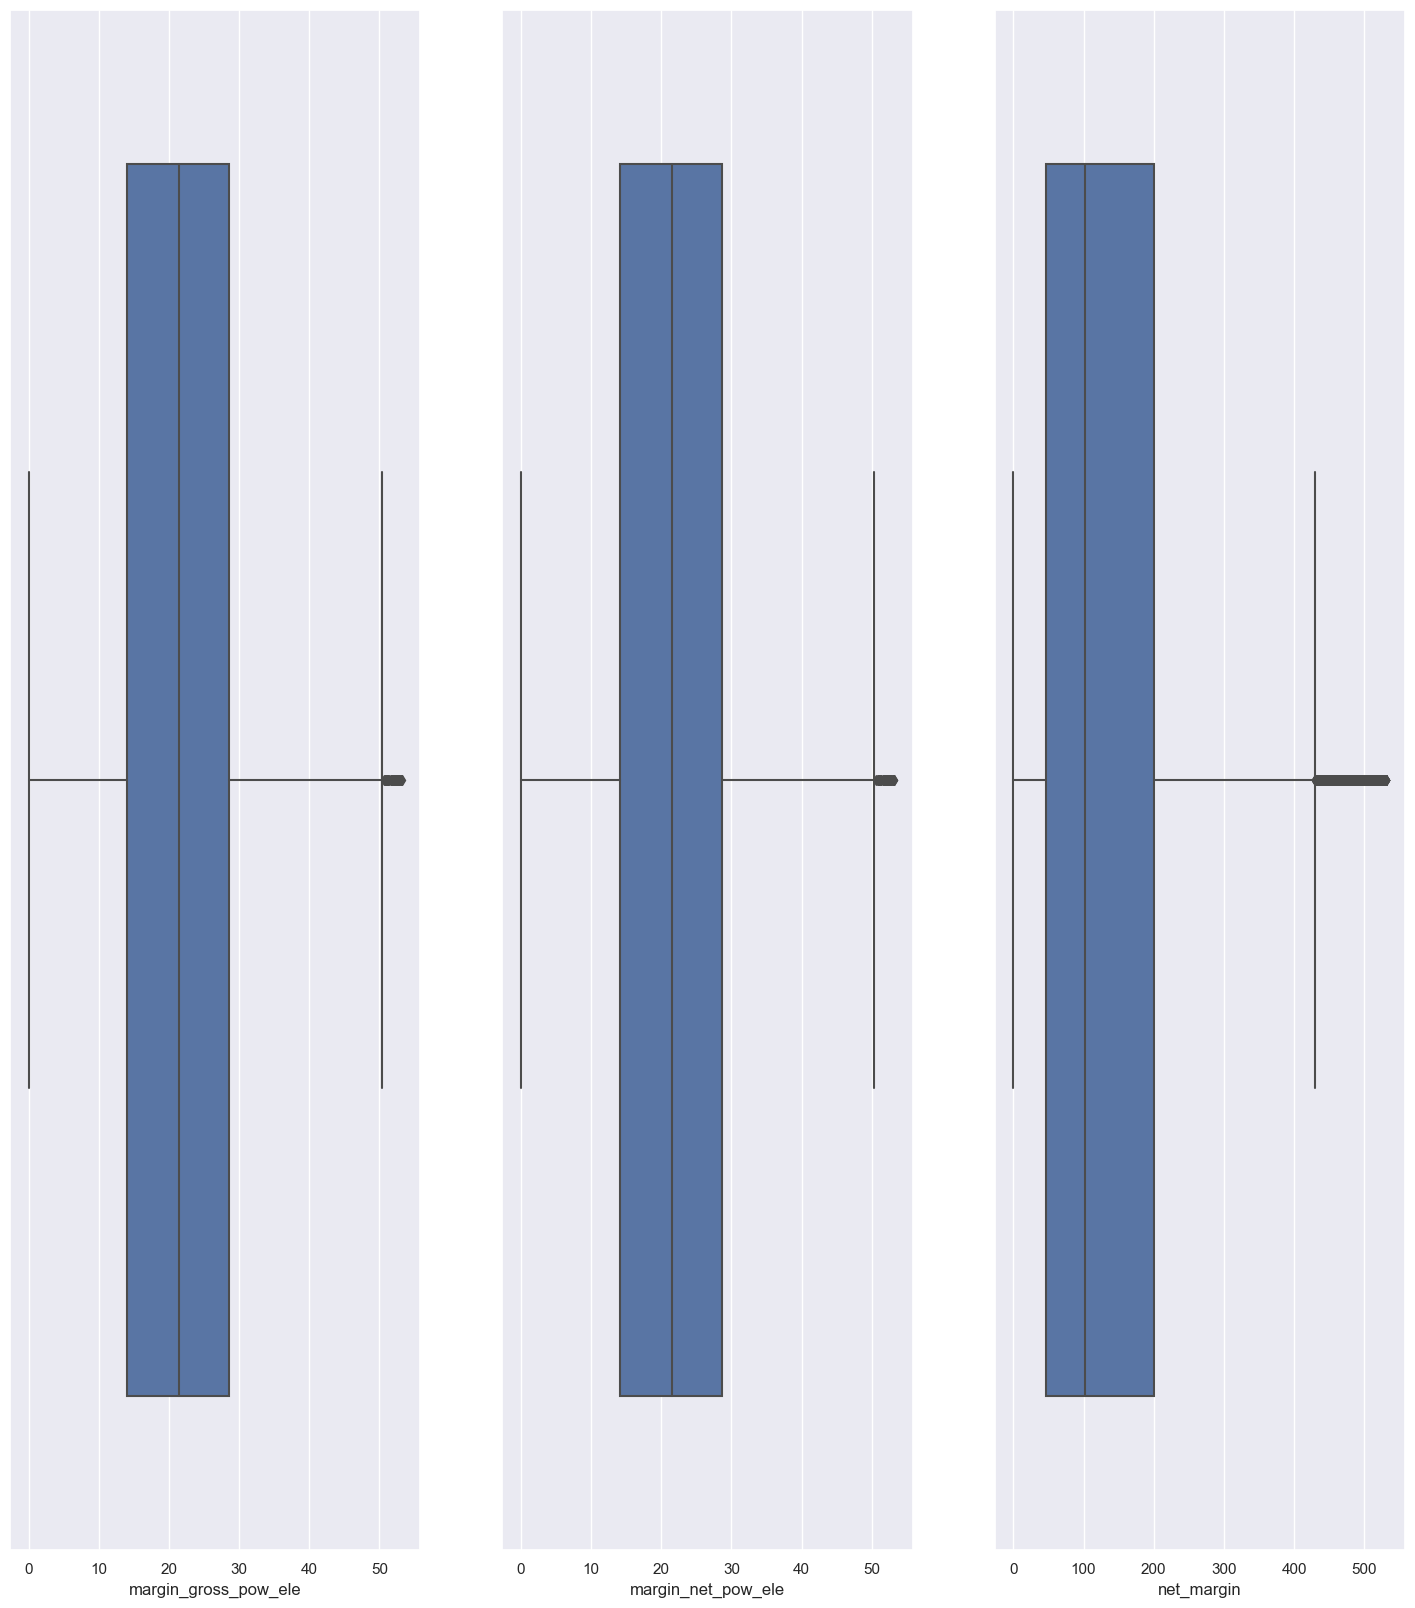

In [99]:
fig, axs = plt.subplots(ncols= 3, figsize=(18,20))
sns.boxplot(x=margin_clean["margin_gross_pow_ele"], ax=axs[0])

sns.boxplot(x= margin_clean["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(x= margin_clean["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].set_xlabel(margin_clean.columns[1])
axs[1].set_xlabel(margin_clean.columns[2])
axs[2].set_xlabel(margin_clean.columns[3])
plt.show()

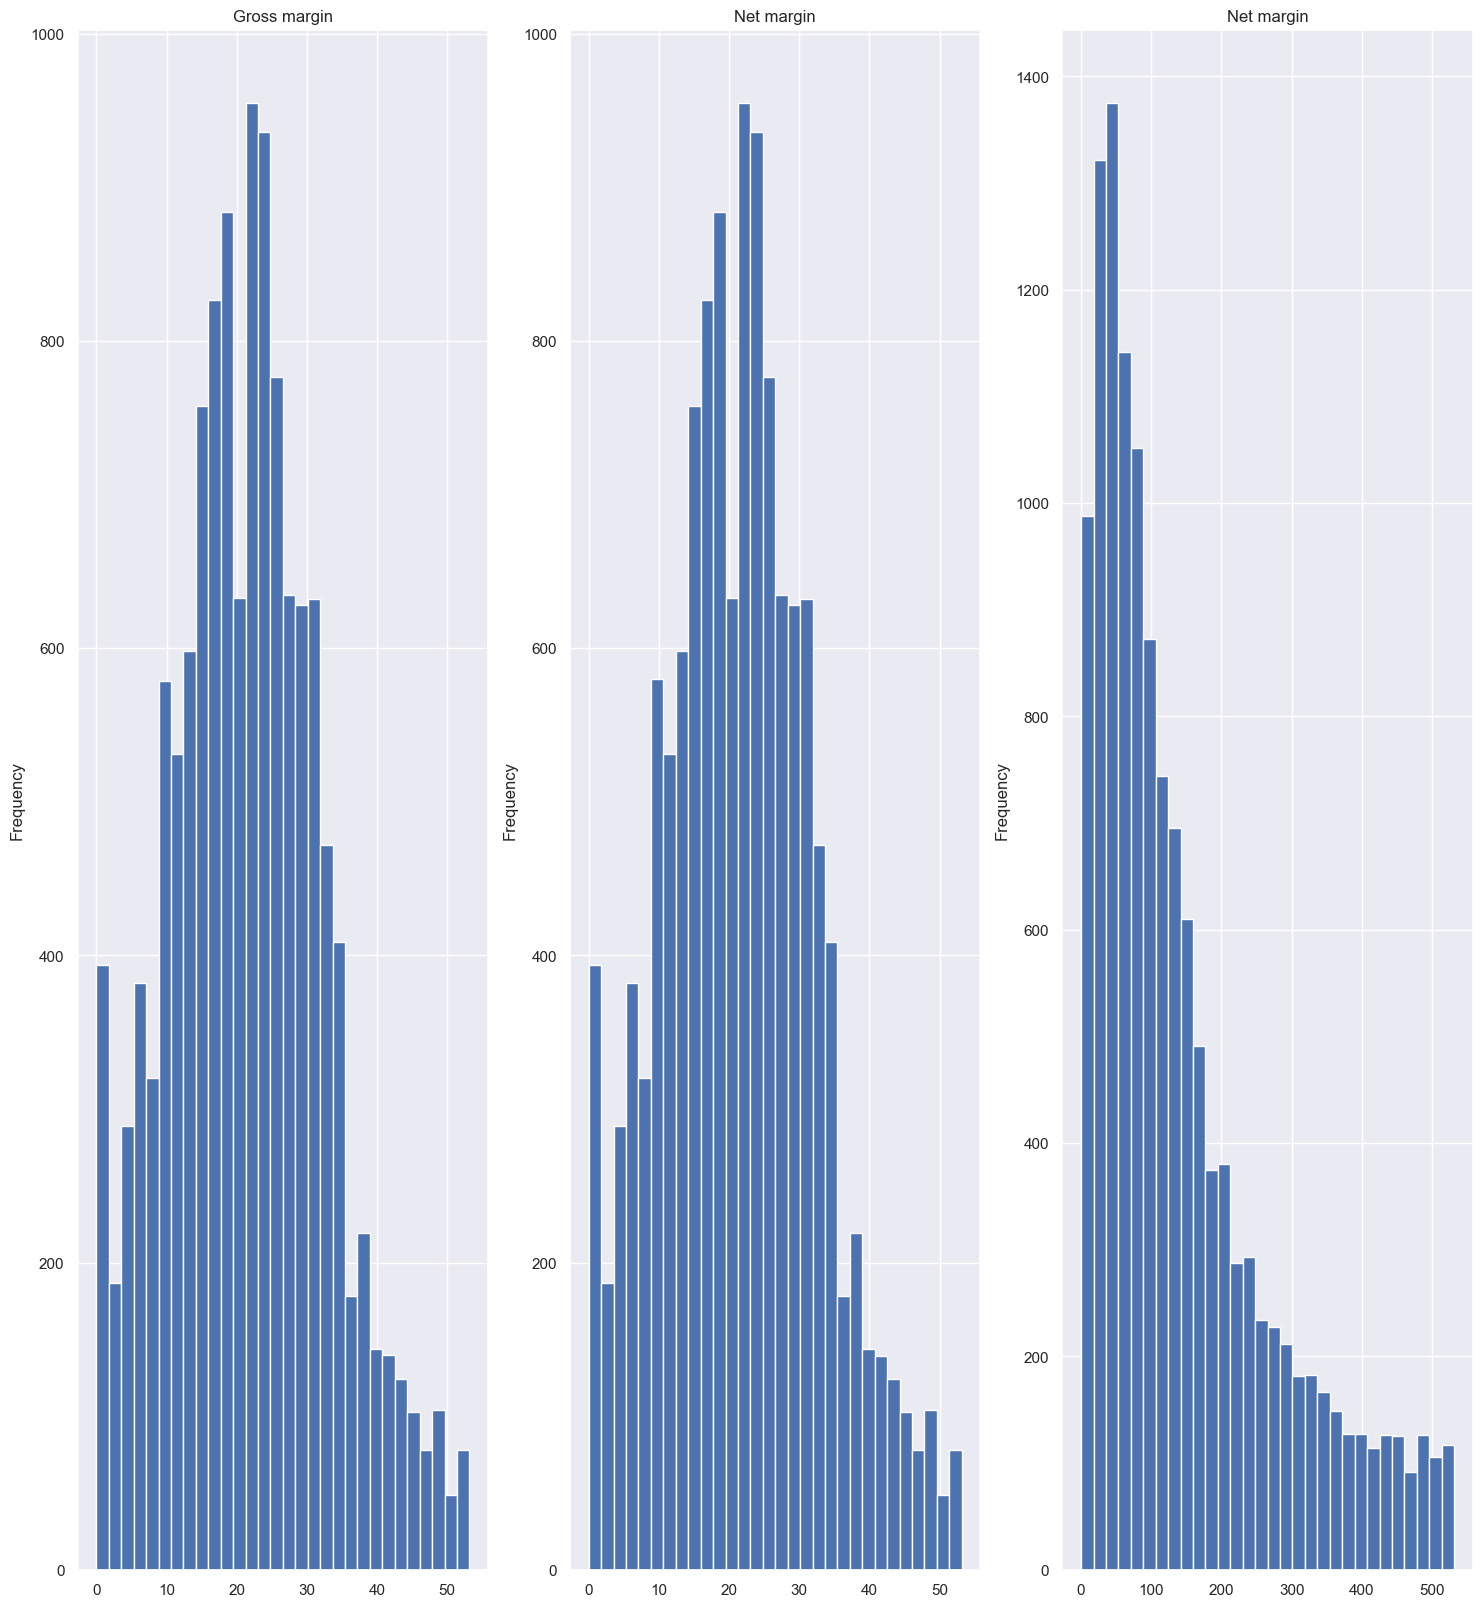

In [100]:
fig, axs = plt.subplots(ncols= 3, figsize=(18,20))
margin_clean['margin_gross_pow_ele'].plot(kind='hist', ax=axs[0], bins=30, title='Gross margin')
margin_clean['margin_net_pow_ele'].plot(kind='hist', ax=axs[1], bins=30, title='Net margin')
margin_clean['net_margin'].plot(kind='hist', ax=axs[2], bins=30, title='Net margin')
plt.show()

As we can see here, after dealing with the outliers, the visualization of both box plots and histogram looks much better to analyze. We will continue with the others after this. 

### Consumption

In [104]:
consumption_clean = clean_data(consumption, ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons'])


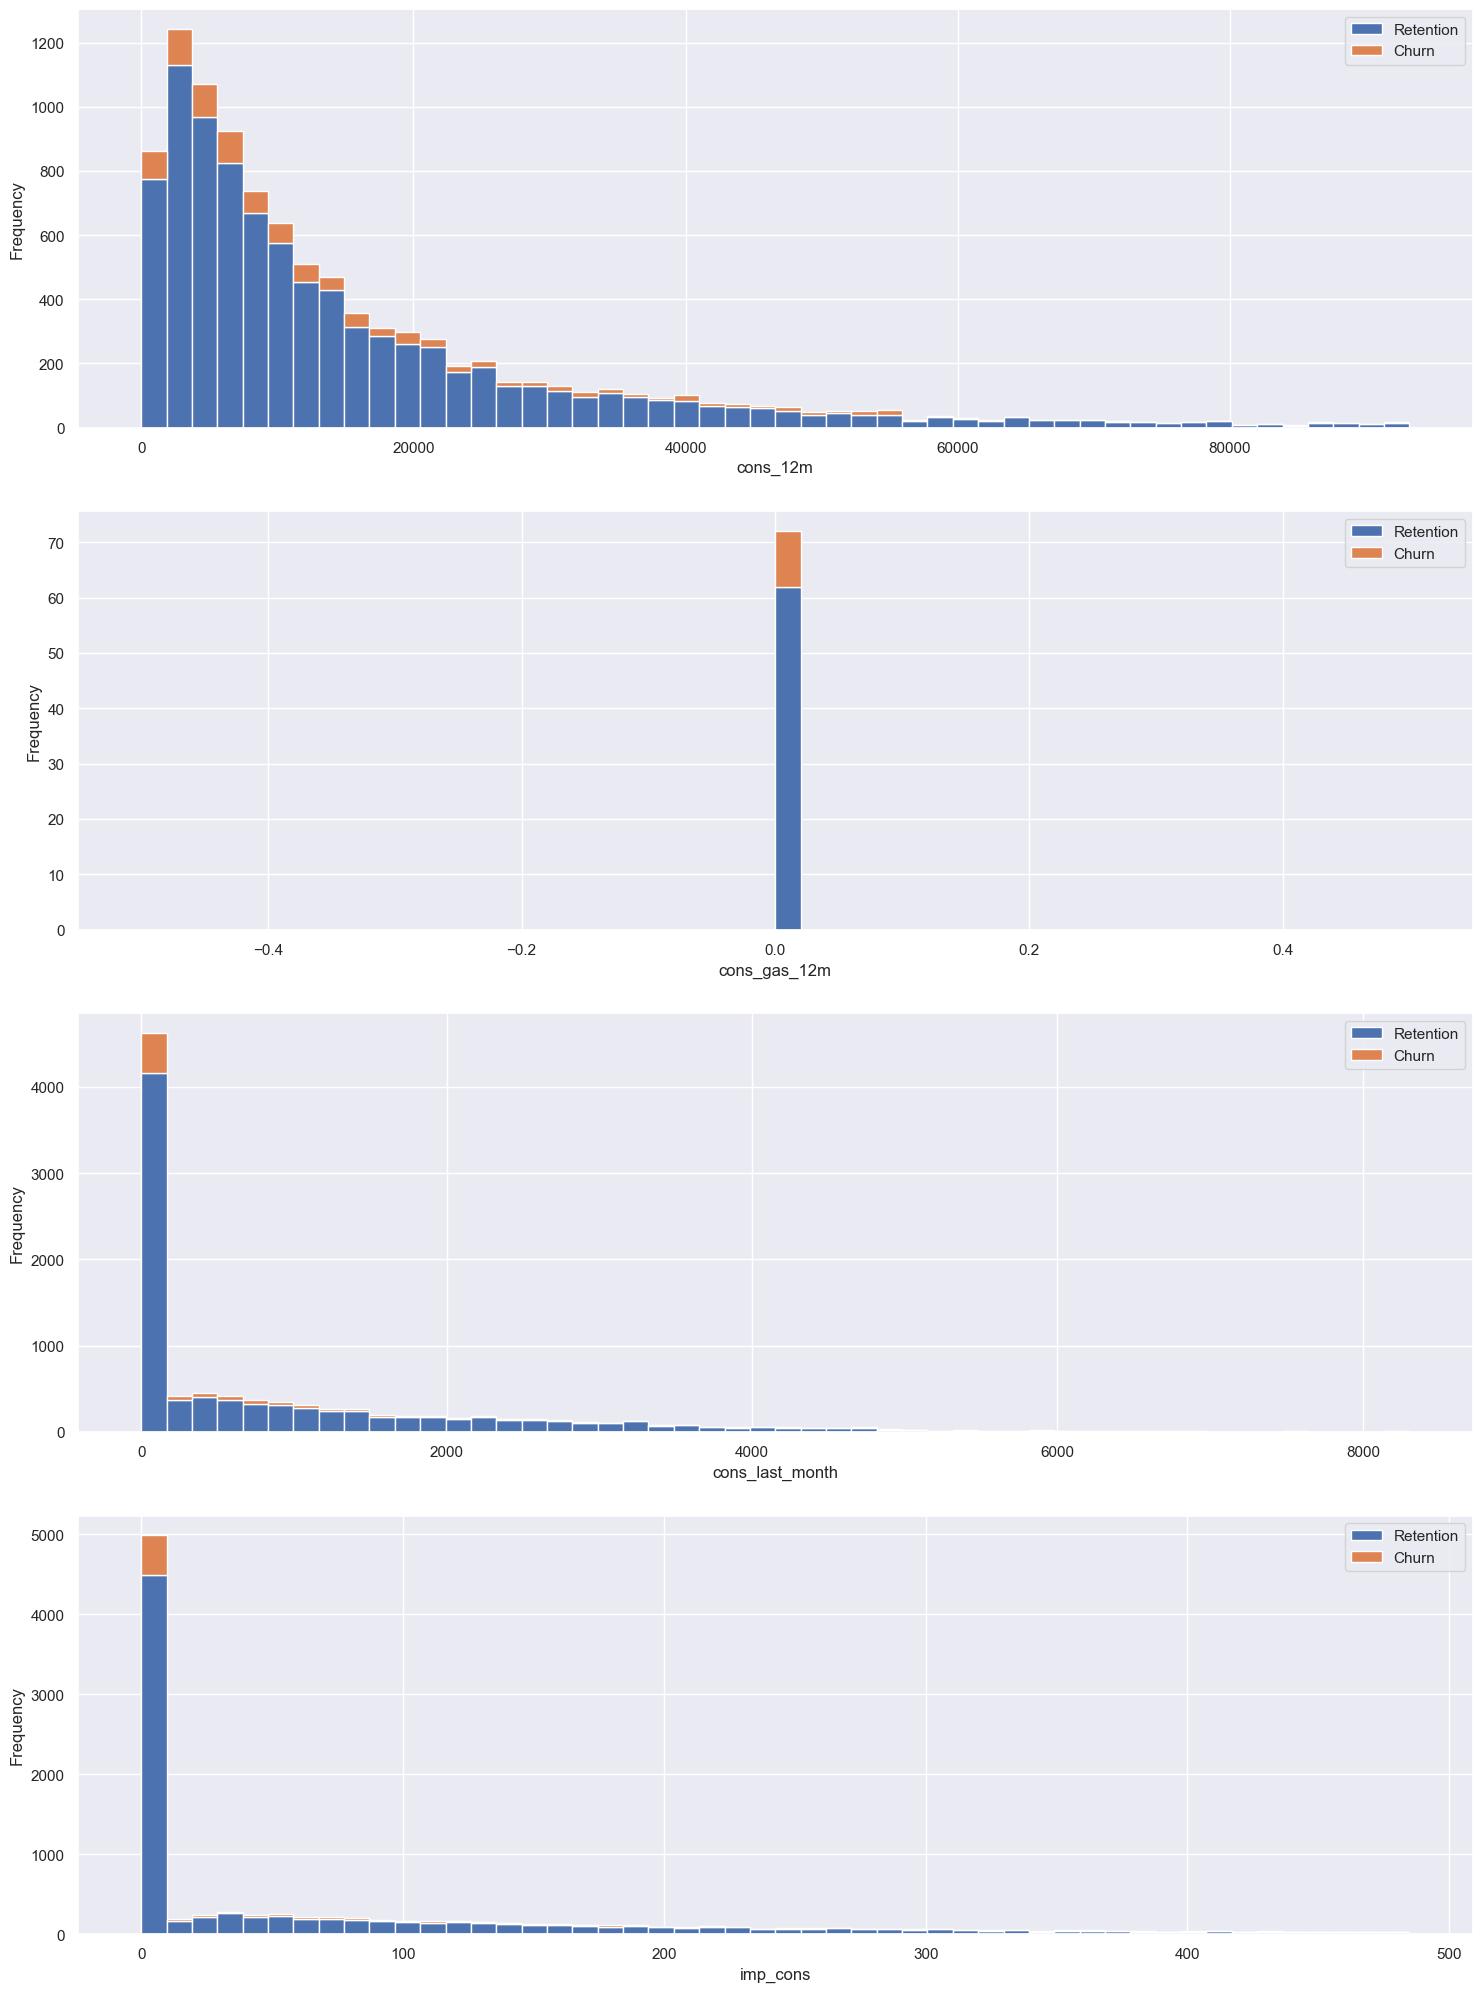

In [105]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption_clean, 'cons_12m', axs[0])

plot_distribution(consumption_clean, 'cons_last_month', axs[2])
plot_distribution(consumption_clean, 'imp_cons', axs[3])
plot_distribution( consumption_clean[consumption_clean['has_gas']=='t'],'cons_gas_12m', axs[1])

### Forecast

In [101]:
forecast_clean = clean_data(forecast, ['forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'forecast_discount_energy'])


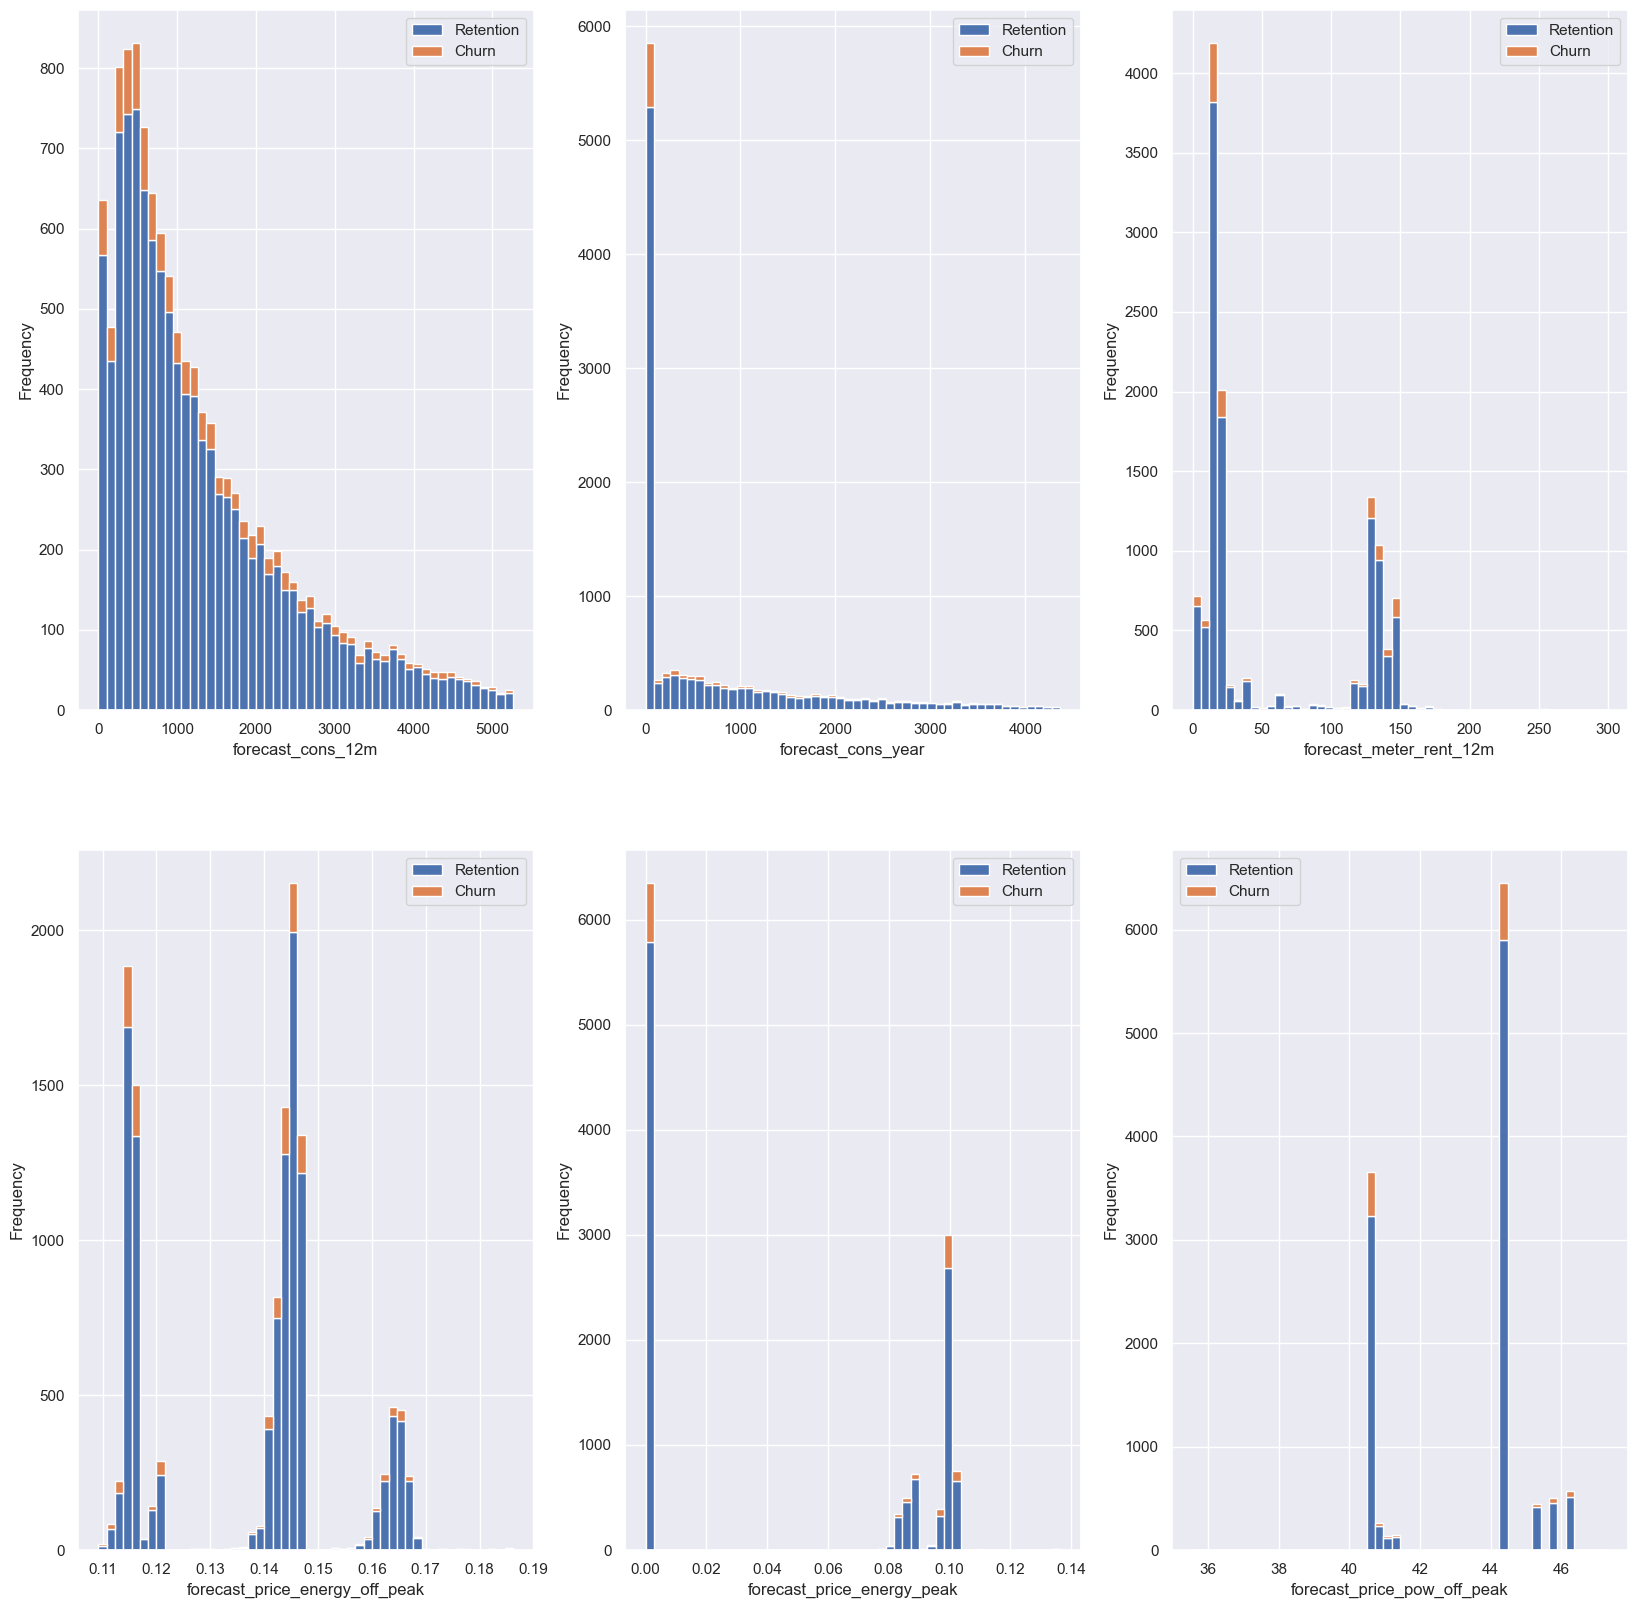

In [103]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
plot_distribution(forecast_clean, 'forecast_cons_12m', axs[0, 0])
plot_distribution(forecast_clean, 'forecast_cons_year', axs[0, 1])
plot_distribution(forecast_clean, 'forecast_meter_rent_12m', axs[0, 2])
plot_distribution(forecast_clean, 'forecast_price_energy_off_peak', axs[1, 0])
plot_distribution(forecast_clean, 'forecast_price_energy_peak', axs[1, 1])
plot_distribution(forecast_clean, 'forecast_price_pow_off_peak', axs[1, 2])

Both cleaned data of forecasts and consumptions are much clearer and gave us much more valuable information. For example, looking at the image, we can see that the lower the forecast and actual energy consumption, the more likely it is for them to move to another provider. We can look into this further in the next steps. This is done for EDA, we will move to the next steps of feature engineering <3